In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
file_path = 'starbucks_AZ_with_store_counts.csv'  # Ensure this is the correct path to your CSV
data = pd.read_csv(file_path)

# Add dummy population data
population_data = {
    'Scottsdale': 250000,
    'Phoenix': 1600000,
    'Gilbert': 250000,
    'Chandler': 260000,
    'Goodyear': 85000
}

# Create the 'population' column based on the city
data['population'] = data['city'].map(population_data)

# Handle missing population data
data['population'].fillna(1, inplace=True)  # To avoid division by zero

# Display the updated DataFrame
print(data.head())

# Save the updated DataFrame to a new CSV file
# Try saving to a different directory where you have write permissions
# Example: Save to your home directory
updated_file_path = 'C:\\Users\\USER\\Desktop\\starbucks_AZ_with_population.csv'  # Change to a directory you have write access to, like your home directory

data.to_csv(updated_file_path, index=False)

print(f"Updated file saved to {updated_file_path}")



   oldid        city country   latitude   longitude  \
0   4151  Scottsdale      US  33.781139 -111.922531   
1   4281     Phoenix      US  33.640507 -112.133507   
2   4317     Gilbert      US  33.348576 -111.720100   
3   4318    Chandler      US  33.319832 -111.891426   
4   4326    Goodyear      US  33.465324 -112.341660   

                              name  store_id  store_count  population  
0       Safeway - Scottsdale #1849      6453           39    250000.0  
1           Safeway - Phoenix #240      6601          103   1600000.0  
2  Bashas - Gilbert/Higley Rd #172      6643           17    250000.0  
3    Ray Road & Loop 101, Chandler      6644           26    260000.0  
4      Dysart & McDowell, Goodyear      6655            6     85000.0  
Updated file saved to C:\Users\USER\Desktop\starbucks_AZ_with_population.csv


In [2]:
data.columns

Index(['oldid', 'city', 'country', 'latitude', 'longitude', 'name', 'store_id',
       'store_count', 'population'],
      dtype='object')

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


oldid          0
city           0
country        0
latitude       0
longitude      0
name           0
store_id       0
store_count    0
population     0
dtype: int64


In [4]:
# Convert columns to appropriate data types
data['store_id'] = data['store_id'].astype(int)
data['city'] = data['city'].astype(str)
data['country'] = data['country'].astype(str)
data['name'] = data['name'].astype(str)
data['oldid'] = data['oldid'].astype(int)
data['latitude'] = data['longitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)
data['store_store'] = data['store_count'].astype(int)

In [5]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)


In [6]:
# Ensure consistent formatting in categorical data
data['city'] = data['city'].str.title()

In [7]:
# Generate summary statistics for numerical columns
print(data.describe())
# Frequency counts for categorical columns
print(data['city'].value_counts())

              oldid    latitude   longitude      store_id  store_count  \
count    326.000000  326.000000  326.000000  3.260000e+02   326.000000   
mean   12612.177914 -111.994767 -111.994767  2.811369e+05    48.760736   
std     5871.735320    0.193853    0.193853  4.375993e+05    38.445860   
min     4151.000000 -112.558250 -112.558250  6.453000e+03     1.000000   
25%     7746.000000 -112.111620 -112.111620  1.095250e+04    18.000000   
50%    11295.500000 -111.970161 -111.970161  1.579250e+04    37.000000   
75%    17480.250000 -111.877028 -111.877028  1.005748e+06   103.000000   
max    25078.000000 -111.599274 -111.599274  1.016356e+06   103.000000   

         population  store_store  
count  3.260000e+02   326.000000  
mean   5.707673e+05    48.760736  
std    7.077118e+05    38.445860  
min    1.000000e+00     1.000000  
25%    1.000000e+00    18.000000  
50%    2.500000e+05    37.000000  
75%    1.600000e+06   103.000000  
max    1.600000e+06   103.000000  
city
Phoenix      

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


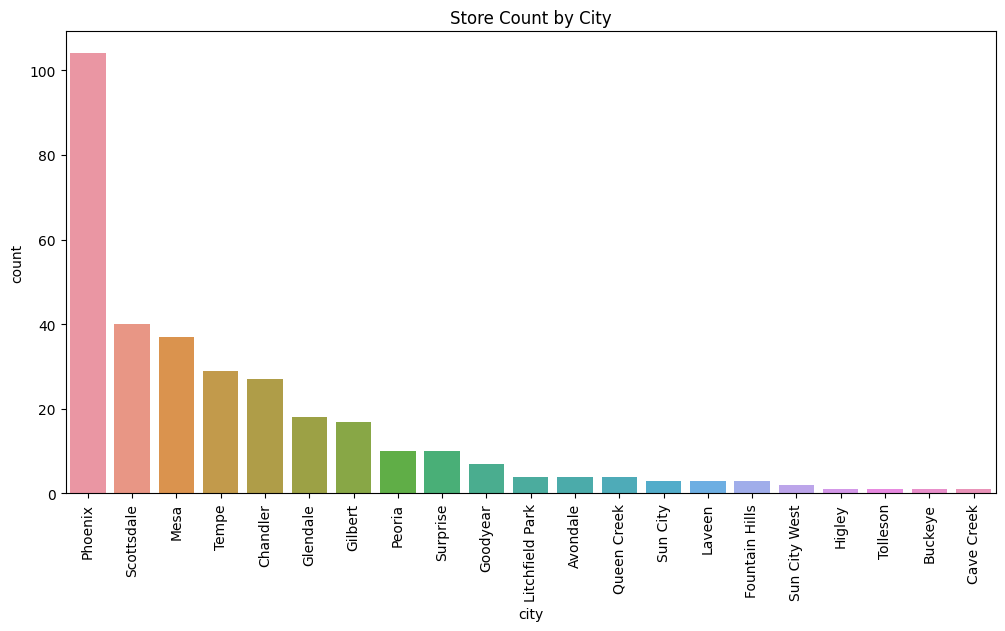

In [8]:
# Bar Chart for Store Count by City
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='city', order=data['city'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Store Count by City')
plt.show()

In [9]:
# Example: Create a new feature - Store Density (stores per 1000 population)
data['store_density'] = data['store_count'] / (data['population'] / 1000)


In [10]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['store_density']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [11]:
# One-hot encode categorical variables
# Convert categorical variables to numerical using one-hot encoding
#X = pd.get_dummies(X, columns=['city', 'country', 'name'])

In [12]:
# Define the target column
target_column = 'store_count'

# Define features and target variable
X = data.drop(target_column, axis=1)
y = data[target_column]

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['city', 'country', 'name'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("Data successfully split into training and testing sets.")


X_train shape: (260, 355)
X_test shape: (66, 355)
y_train shape: (260,)
y_test shape: (66,)
Data successfully split into training and testing sets.


In [13]:
# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [14]:
# Predict on the test set
y_pred = model.predict(X_test)

# Import metrics to evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9242424242424242
Confusion Matrix:
[[ 0  0  1  0  0  0  0  1  1  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 23]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         4
          26       0.83     

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'n_estimators': 200}


In [16]:
import joblib

# Save the trained model
joblib.dump(best_model, 'starbucks_model.pkl')


['starbucks_model.pkl']